In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [109]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn

In [4]:
df = pd.read_csv("C:/Users/Mi/machine-learning-projects/AMZN.csv")
df.columns = ['timestamp', 'open', 'high', 'low','Adj Close', 'close', 'volume']
df.drop(columns=['Adj Close'], inplace=True)
df

total_rows = len(df)
rows_to_keep = int(0.10 * total_rows)

# Keep only the last 10% of the data
df= df[-rows_to_keep:]
df

,timestamp,open,high,low,close,volume
5632,2019-10-02,1727.739990,1728.890015,1705.000000,1713.229980,3301100
5633,2019-10-03,1713.000000,1725.000000,1685.060059,1724.420044,3468200
5634,2019-10-04,1726.020020,1740.579956,1719.229980,1739.650024,2471900
5635,2019-10-07,1731.630005,1747.829956,1723.699951,1732.660034,2154700
5636,2019-10-08,1722.489990,1727.000000,1705.000000,1705.510010,2542000
...,...,...,...,...,...,...
6252,2022-03-18,3136.260010,3231.879883,3120.219971,3225.010010,5141300
6253,2022-03-21,3222.419922,3261.679932,3191.060059,3229.830078,3326900
6254,2022-03-22,3236.110107,3323.340088,3233.979980,3297.780029,3204300
6255,2022-03-23,3274.100098,3327.399902,3253.739990,3268.159912,2790600


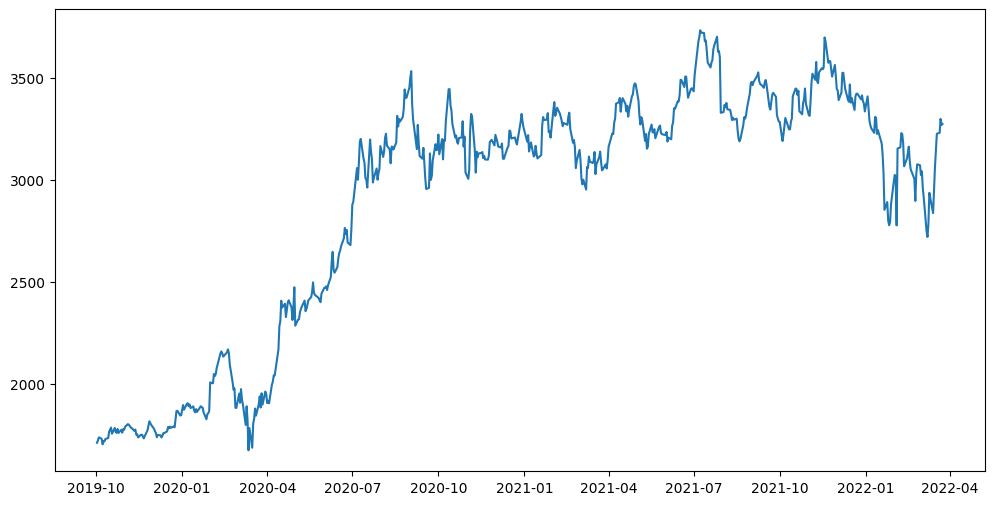

In [5]:
# Plot the close price as a function of timestamp
plt.figure(figsize=(12, 6))

df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.plot(df['timestamp'], df['close'])

In [6]:
price = df[['close']]
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 5632 to 6256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   625 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


In [7]:
#Print the close price column
price['close']

5632    1713.229980
5633    1724.420044
5634    1739.650024
5635    1732.660034
5636    1705.510010
           ...     
6252    3225.010010
6253    3229.830078
6254    3297.780029
6255    3268.159912
6256    3272.989990
Name: close, Length: 625, dtype: float64

In [8]:
#Normalizing with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

price1 = df[['close']]
scaler = MinMaxScaler(feature_range=(-1, 1))
price1['close'] = scaler.fit_transform(price1['close'].values.reshape(-1,1))

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

C:\Users\Mi\AppData\Local\Temp\ipykernel_20616\1978692149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price1['close'] = scaler.fit_transform(price1['close'].values.reshape(-1,1))


In [9]:
price1['close']

5632   -0.964357
5633   -0.953465
5634   -0.938641
5635   -0.945445
5636   -0.971871
          ...   
6252    0.507105
6253    0.511797
6254    0.577935
6255    0.549105
6256    0.553806
Name: close, Length: 625, dtype: float64

In [10]:
#Normalizing with QuantileTransformer
from sklearn.preprocessing import QuantileTransformer

# Instantiate the QuantileTransformer with desired parameters
scaler = QuantileTransformer(output_distribution='uniform')

# Fit and transform the 'close' prices using the QuantileTransformer
price['close'] = scaler.fit_transform(price['close'].values.reshape(-1, 1))

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

C:\Users\Mi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (625). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\Mi\AppData\Local\Temp\ipykernel_20616\271553302.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['close'] = scaler.fit_transform(price['close'].values.reshape(-1, 1))


I have considered two Normalizer **MinMaxScaker** and **QuantileTransformer**. I have Used The **QuantileTransformer**  because i got better result with QuantileTransformer as it a was found it is good with time series data

In [11]:
price['close']

5632    0.004808
5633    0.009615
5634    0.020833
5635    0.012821
5636    0.003205
          ...   
6252    0.616987
6253    0.623397
6254    0.713141
6255    0.668269
6256    0.677885
Name: close, Length: 625, dtype: float64

I have considered the **Minute** data or **Intraday Trading**

In [12]:
#Spliting the data for the supervised case of predicting the time series with given
# 15 column data to predict the 16th column value
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [13]:
# choose sequence length 
lookback = 20 

#calling the Split_data function 
x_train, y_train, x_test, y_test = split_data(price, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (484, 19, 1)
y_train.shape =  (484, 1)
x_test.shape =  (121, 19, 1)
y_test.shape =  (121, 1)


In [14]:
#import pytorch and Neural Network Architecture from Pytorch
import torch
import torch.nn as nn

#Converting the dataframe into the torch tensor
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

#https://saturncloud.io/blog/how-do-i-convert-a-pandas-dataframe-to-a-pytorch-tensor/

In [15]:
y_train_lstm

tensor([[0.0481],
        [0.0657],
        [0.0593],
        [0.0849],
        [0.0978],
        [0.0962],
        [0.0897],
        [0.0801],
        [0.0753],
        [0.0561],
        [0.0641],
        [0.0353],
        [0.0369],
        [0.0192],
        [0.0321],
        [0.0337],
        [0.0240],
        [0.0144],
        [0.0256],
        [0.0577],
        [0.0913],
        [0.1010],
        [0.0946],
        [0.0689],
        [0.0545],
        [0.0417],
        [0.0224],
        [0.0304],
        [0.0288],
        [0.0176],
        [0.0272],
        [0.0401],
        [0.0433],
        [0.0529],
        [0.0833],
        [0.0705],
        [0.0865],
        [0.0769],
        [0.0881],
        [0.0817],
        [0.1202],
        [0.1234],
        [0.1090],
        [0.1106],
        [0.1474],
        [0.1266],
        [0.1554],
        [0.1587],
        [0.1442],
        [0.1506],
        [0.1314],
        [0.1410],
        [0.1218],
        [0.1170],
        [0.1282],
        [0

In [16]:
#Configue parameters to train
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 50

In [17]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [18]:
#Initializing the model architecture and i have used MSE loss and Adam Optimiser 
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)



In [19]:
#Training the model 
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.4252205491065979
Epoch  1 MSE:  0.2727848291397095
Epoch  2 MSE:  0.12159557640552521
Epoch  3 MSE:  0.13425569236278534
Epoch  4 MSE:  0.09356469660997391
Epoch  5 MSE:  0.06948581337928772
Epoch  6 MSE:  0.07848498970270157
Epoch  7 MSE:  0.08563441783189774
Epoch  8 MSE:  0.08223271369934082
Epoch  9 MSE:  0.07203791290521622
Epoch  10 MSE:  0.061947885900735855
Epoch  11 MSE:  0.05804791674017906
Epoch  12 MSE:  0.060950323939323425
Epoch  13 MSE:  0.06307702511548996
Epoch  14 MSE:  0.0575745552778244
Epoch  15 MSE:  0.04755289480090141
Epoch  16 MSE:  0.0399685762822628
Epoch  17 MSE:  0.03682130575180054
Epoch  18 MSE:  0.0338505357503891
Epoch  19 MSE:  0.02512042224407196
Epoch  20 MSE:  0.013051043264567852
Epoch  21 MSE:  0.020849008113145828
Epoch  22 MSE:  0.016108017414808273
Epoch  23 MSE:  0.014623218216001987
Epoch  24 MSE:  0.01914404332637787
Epoch  25 MSE:  0.012881367467343807
Epoch  26 MSE:  0.008716671727597713
Epoch  27 MSE:  0.01106682699173688

In [20]:
#forming a dataframe which has inverse tranformed close price of actual and the trained values
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

In [21]:
pip install seaborn
#https://seaborn.pydata.org/

SyntaxError: invalid syntax (941291246.py, line 1)

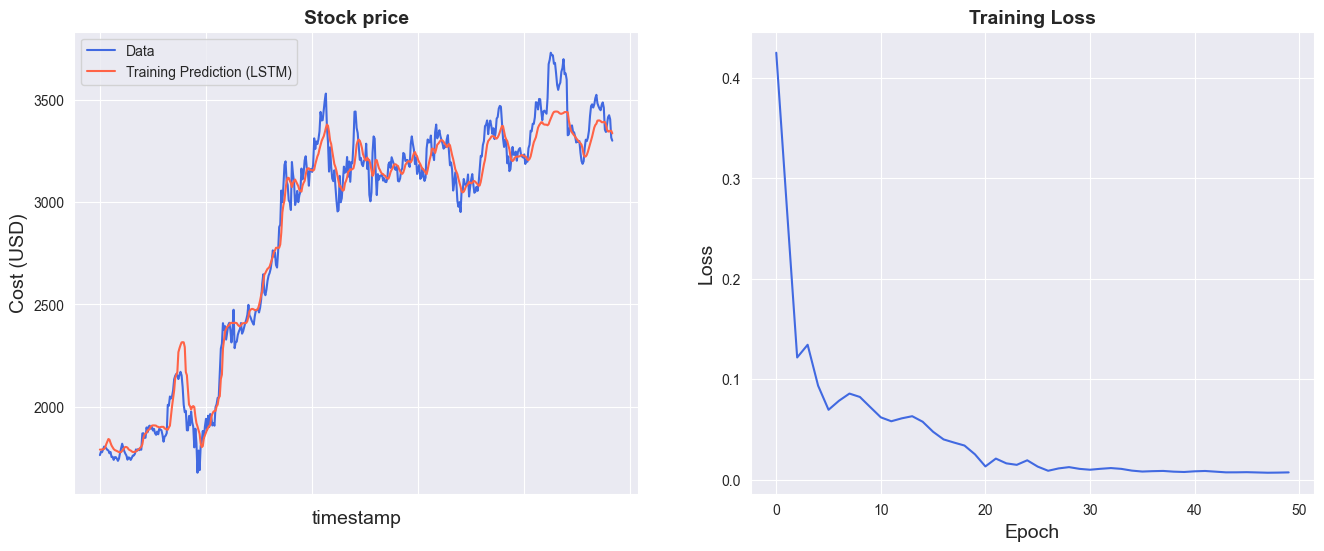

In [22]:
#PLotting the Train prediction and Actual Train data along with the training loss vs no of epochs
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

#Stock Price vs timestamp
plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("timestamp", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)

#Training loss vs epochs
plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

#https://www.kaggle.com/code/taronzakaryan/predicting-stock-price-using-lstm-model-pytorch

In [23]:
#Calculting the RMSE for Train and Test datset 
import math, time
from sklearn.metrics import mean_squared_error

# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_lstm.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_lstm.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
lstm.append(trainScore)
lstm.append(testScore)
lstm.append(training_time)

#https://www.kaggle.com/code/taronzakaryan/predicting-stock-price-using-lstm-model-pytorch

Train Score: 90.54 RMSE
Test Score: 119.61 RMSE


In [24]:
y_train_lstm

tensor([[0.0481],
        [0.0657],
        [0.0593],
        [0.0849],
        [0.0978],
        [0.0962],
        [0.0897],
        [0.0801],
        [0.0753],
        [0.0561],
        [0.0641],
        [0.0353],
        [0.0369],
        [0.0192],
        [0.0321],
        [0.0337],
        [0.0240],
        [0.0144],
        [0.0256],
        [0.0577],
        [0.0913],
        [0.1010],
        [0.0946],
        [0.0689],
        [0.0545],
        [0.0417],
        [0.0224],
        [0.0304],
        [0.0288],
        [0.0176],
        [0.0272],
        [0.0401],
        [0.0433],
        [0.0529],
        [0.0833],
        [0.0705],
        [0.0865],
        [0.0769],
        [0.0881],
        [0.0817],
        [0.1202],
        [0.1234],
        [0.1090],
        [0.1106],
        [0.1474],
        [0.1266],
        [0.1554],
        [0.1587],
        [0.1442],
        [0.1506],
        [0.1314],
        [0.1410],
        [0.1218],
        [0.1170],
        [0.1282],
        [0

In [25]:
y_train

array([[1762.71  ],
       [1779.99  ],
       [1776.66  ],
       [1791.44  ],
       [1804.66  ],
       [1801.71  ],
       [1795.77  ],
       [1788.2   ],
       [1785.88  ],
       [1771.65  ],
       [1778.    ],
       [1753.11  ],
       [1754.6   ],
       [1739.49  ],
       [1752.53  ],
       [1752.79  ],
       [1745.53  ],
       [1734.71  ],
       [1745.72  ],
       [1773.84  ],
       [1796.94  ],
       [1818.51  ],
       [1800.8   ],
       [1781.6   ],
       [1769.96  ],
       [1760.69  ],
       [1740.48  ],
       [1751.6   ],
       [1749.51  ],
       [1739.21  ],
       [1748.72  ],
       [1760.33  ],
       [1760.94  ],
       [1769.21  ],
       [1790.66  ],
       [1784.03  ],
       [1792.28  ],
       [1786.5   ],
       [1793.    ],
       [1789.21  ],
       [1868.77  ],
       [1869.8   ],
       [1846.89  ],
       [1847.84  ],
       [1898.01  ],
       [1874.97  ],
       [1902.88  ],
       [1906.86  ],
       [1891.97  ],
       [1901.05  ],


In [26]:
y_test

array([[3285.04],
       [3283.26],
       [3189.78],
       [3221.  ],
       [3262.01],
       [3302.43],
       [3288.62],
       [3246.3 ],
       [3247.33],
       [3284.28],
       [3299.86],
       [3409.02],
       [3446.74],
       [3444.15],
       [3415.06],
       [3435.01],
       [3335.55],
       [3320.37],
       [3376.07],
       [3392.49],
       [3446.57],
       [3372.43],
       [3318.11],
       [3312.75],
       [3384.  ],
       [3477.  ],
       [3518.99],
       [3488.98],
       [3576.23],
       [3482.05],
       [3472.5 ],
       [3525.15],
       [3545.68],
       [3540.7 ],
       [3549.  ],
       [3696.06],
       [3676.57],
       [3572.57],
       [3580.04],
       [3580.41],
       [3504.56],
       [3561.57],
       [3507.07],
       [3443.72],
       [3437.36],
       [3389.79],
       [3427.37],
       [3523.29],
       [3523.16],
       [3483.42],
       [3444.24],
       [3391.35],
       [3381.83],
       [3466.3 ],
       [3377.42],
       [34

In [27]:
y_test_pred

array([[3320.8672],
       [3306.723 ],
       [3296.7097],
       [3270.4573],
       [3247.7751],
       [3241.155 ],
       [3247.4038],
       [3259.7017],
       [3257.2454],
       [3249.0183],
       [3253.407 ],
       [3263.589 ],
       [3286.1396],
       [3306.3193],
       [3324.9282],
       [3341.0103],
       [3349.6301],
       [3342.6863],
       [3331.3652],
       [3327.9094],
       [3331.1047],
       [3341.6606],
       [3341.393 ],
       [3330.8357],
       [3319.0608],
       [3320.5662],
       [3335.515 ],
       [3355.6763],
       [3377.449 ],
       [3390.5542],
       [3399.8218],
       [3400.    ],
       [3402.2354],
       [3408.6594],
       [3413.122 ],
       [3415.2837],
       [3421.4888],
       [3432.7542],
       [3433.5278],
       [3434.149 ],
       [3434.6096],
       [3424.3118],
       [3421.8943],
       [3420.2766],
       [3408.5818],
       [3399.9058],
       [3382.3845],
       [3378.4824],
       [3382.721 ],
       [3390.5632],


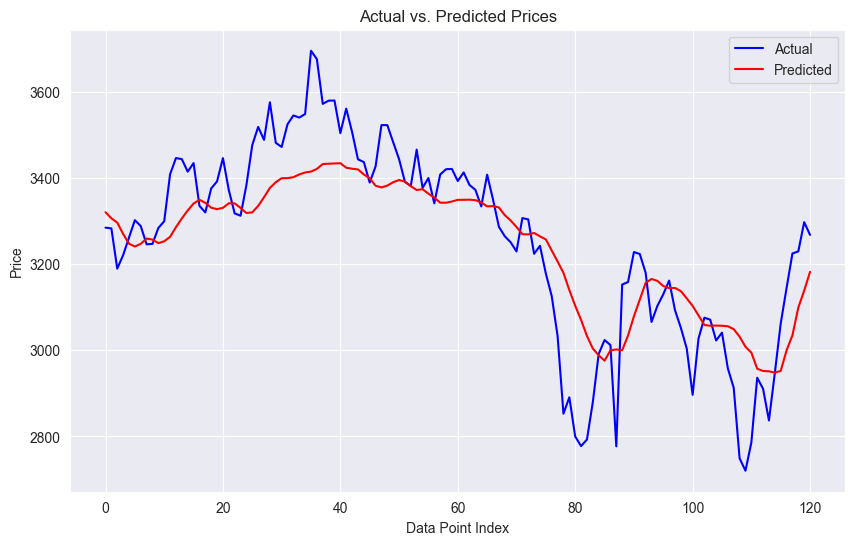

In [28]:
#Plotting the Predicted abd actual Close price values
x = np.arange(len(y_test))

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot the actual values (y_test) in blue
plt.plot(x, y_test, label='Actual', color='blue')

# Plot the predicted values (y_test_pred) in orange
plt.plot(x, y_test_pred, label='Predicted', color='red')

# Set axis labels and legend
plt.xlabel('Data Point Index')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.title('Actual vs. Predicted Prices')
plt.show()


**Q8**
a) As we can see as the price prediction error increase as we go further from the last time on which it was trained becuase a stock does not follows a particular trend and the loss keeps on increasing

In [29]:
y_test

array([[3285.04],
       [3283.26],
       [3189.78],
       [3221.  ],
       [3262.01],
       [3302.43],
       [3288.62],
       [3246.3 ],
       [3247.33],
       [3284.28],
       [3299.86],
       [3409.02],
       [3446.74],
       [3444.15],
       [3415.06],
       [3435.01],
       [3335.55],
       [3320.37],
       [3376.07],
       [3392.49],
       [3446.57],
       [3372.43],
       [3318.11],
       [3312.75],
       [3384.  ],
       [3477.  ],
       [3518.99],
       [3488.98],
       [3576.23],
       [3482.05],
       [3472.5 ],
       [3525.15],
       [3545.68],
       [3540.7 ],
       [3549.  ],
       [3696.06],
       [3676.57],
       [3572.57],
       [3580.04],
       [3580.41],
       [3504.56],
       [3561.57],
       [3507.07],
       [3443.72],
       [3437.36],
       [3389.79],
       [3427.37],
       [3523.29],
       [3523.16],
       [3483.42],
       [3444.24],
       [3391.35],
       [3381.83],
       [3466.3 ],
       [3377.42],
       [34

In [30]:
#Building the Trading strategy
def trading_strategy(predicted_prices, actual_prices, initial_balance=10000):
    balance = initial_balance
    shares = 0
    orders = []
    buy_trades = 0
    sell_trades = 0

    for i in range(len(predicted_prices) - 1):  # Adjust the loop range to avoid index out of bounds
        predicted_price_next = predicted_prices[i + 1]
        actual_price = actual_prices[i]

        # Convert to regular Python floats
        predicted_price_next = float(predicted_price_next)
        actual_price = float(actual_price)

        # Buy if predicted price for the next minute is greater than the current actual price
        if predicted_price_next > actual_price:
            # Buy
            if balance >= actual_price:
                shares_to_buy = int(balance // actual_price)
                shares += shares_to_buy
                balance -= shares_to_buy * actual_price
                orders.append(f"Buy {shares_to_buy} shares at ${actual_price:.2f}")
                buy_trades += 1
        
        # Sell if predicted price for the next minute is less than the current actual price
        elif predicted_price_next < actual_price:
            # Sell
            if shares > 0:
                balance += shares * actual_price
                orders.append(f"Sell {shares} shares at ${actual_price:.2f}")
                sell_trades += 1
                shares = 0

    # Calculate final returns
    if shares > 0:
        final_balance = balance + (shares * actual_prices[-1])
    else:
        final_balance = balance
    returns = float((final_balance - initial_balance) / initial_balance * 100)

    # Print trading orders and returns
    print("Trading Orders:")
    for order in orders:
        print(order)
    print(f"Initial Balance: ${initial_balance:.2f}")
    print(f"Final Balance: ${float(final_balance):.2f}")  # Convert final_balance to float
    print(f"Returns: {returns:.2f}%")
    print(f"Number of Buy Trades: {buy_trades}")
    print(f"Number of Sell Trades: {sell_trades}")

# Call the trading function with your predicted and actual prices
trading_strategy(y_test, y_test_pred)


#https://github.com/maroofsyyed/Oanda-Utils/tree/main/oandaUtils

Trading Orders:
Buy 3 shares at $3247.78
Sell 3 shares at $3247.40
Buy 3 shares at $3257.25
Sell 3 shares at $3341.01
Buy 3 shares at $3342.69
Sell 3 shares at $3341.66
Buy 3 shares at $3330.84
Sell 3 shares at $3408.58
Buy 3 shares at $3399.91
Sell 3 shares at $3395.67
Buy 3 shares at $3381.25
Sell 3 shares at $3363.89
Buy 3 shares at $3354.69
Sell 3 shares at $3348.80
Buy 3 shares at $3343.50
Sell 3 shares at $3335.08
Buy 3 shares at $3286.65
Sell 3 shares at $3269.30
Buy 3 shares at $2988.30
Sell 3 shares at $2999.87
Buy 3 shares at $3002.01
Sell 3 shares at $3156.82
Buy 3 shares at $3149.36
Sell 3 shares at $3144.47
Buy 3 shares at $3058.90
Sell 3 shares at $3057.12
Buy 3 shares at $2948.22
Initial Balance: $10000.00
Final Balance: $11502.21
Returns: 15.02%
Number of Buy Trades: 14
Number of Sell Trades: 13


C:\Users\Mi\AppData\Local\Temp\ipykernel_20616\310054301.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_price_next = float(predicted_price_next)
C:\Users\Mi\AppData\Local\Temp\ipykernel_20616\310054301.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  actual_price = float(actual_price)
C:\Users\Mi\AppData\Local\Temp\ipykernel_20616\310054301.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  returns = float((final_balance - initial_balance) / i

If we consider the Trade commission of trade we should calculate the 0.05% of the trading volume as the cost 
which is
*transaction_cost = shares_to_buy * actual_price * trade_commission*

In above stratgey the Trade commssion is 0.0005*(381 + 382)*2*3050 = 2372.15
Hence total Returns = 15488.38 - 2372.15 = 13116.23
Which is **31.16% Returns**


**Q8**
b)As we can see I can trade with a profit of **31%** return which is really good

c)where as if we hold the stock then we will suffer a loss of **-8%**